# Identitas
Nama: Muhammad Fauzan

Div: Data Sains (Basic)

Tugas: Modul Week 8

Tipe Soal: A/1

# Load Data

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

auto_mpg = fetch_ucirepo(id=9)

X = auto_mpg.data.features
y = auto_mpg.data.targets

print(auto_mpg.metadata)

print(auto_mpg.variables)

{'uci_id': 9, 'name': 'Auto MPG', 'repository_url': 'https://archive.ics.uci.edu/dataset/9/auto+mpg', 'data_url': 'https://archive.ics.uci.edu/static/public/9/data.csv', 'abstract': 'Revised from CMU StatLib library, data concerns city-cycle fuel consumption', 'area': 'Other', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 398, 'num_features': 7, 'feature_types': ['Real', 'Categorical', 'Integer'], 'demographics': [], 'target_col': ['mpg'], 'index_col': ['car_name'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1993, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5859H', 'creators': ['R. Quinlan'], 'intro_paper': None, 'additional_info': {'summary': 'This dataset is a slightly modified version of the dataset provided in the StatLib library.  In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for th

# EDA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.concat([X, y], axis=1)
display(df.head())

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    392 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   mpg           398 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [ ]:
df.describe()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
count,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,193.425879,5.454774,104.469388,2970.424623,15.568090,76.010050,1.572864,23.514573
std,104.269838,1.701004,38.491160,846.841774,2.757689,3.697627,0.802055,7.815984
min,68.000000,3.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,104.250000,4.000000,75.000000,2223.750000,13.825000,73.000000,1.000000,17.500000
50%,148.500000,4.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,23.000000
75%,262.000000,8.000000,126.000000,3608.000000,17.175000,79.000000,2.000000,29.000000
max,455.000000,8.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


In [ ]:
df.nunique()

,0
displacement,82
cylinders,5
horsepower,93
weight,351
acceleration,95
model_year,13
origin,3
mpg,129


In [ ]:
for i in df.columns:
    print(f"{i}: {df[i].unique()}")

displacement: [307.  350.  318.  304.  302.  429.  454.  440.  455.  390.  383.  340.
 400.  113.  198.  199.  200.   97.  110.  107.  104.  121.  360.  140.
  98.  232.  225.  250.  351.  258.  122.  116.   79.   88.   71.   72.
  91.   97.5  70.  120.   96.  108.  155.   68.  114.  156.   76.   83.
  90.  231.  262.  134.  119.  171.  115.  101.  305.   85.  130.  168.
 111.  260.  151.  146.   80.   78.  105.  131.  163.   89.  267.   86.
 183.  141.  173.  135.   81.  100.  145.  112.  181.  144. ]
cylinders: [8 4 6 3 5]
horsepower: [130. 165. 150. 140. 198. 220. 215. 225. 190. 170. 160.  95.  97.  85.
  88.  46.  87.  90. 113. 200. 210. 193.  nan 100. 105. 175. 153. 180.
 110.  72.  86.  70.  76.  65.  69.  60.  80.  54. 208. 155. 112.  92.
 145. 137. 158. 167.  94. 107. 230.  49.  75.  91. 122.  67.  83.  78.
  52.  61.  93. 148. 129.  96.  71.  98. 115.  53.  81.  79. 120. 152.
 102. 108.  68.  58. 149.  89.  63.  48.  66. 139. 103. 125. 133. 138.
 135. 142.  77.  62. 132.  84. 

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
displacement,0
cylinders,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
mpg,0


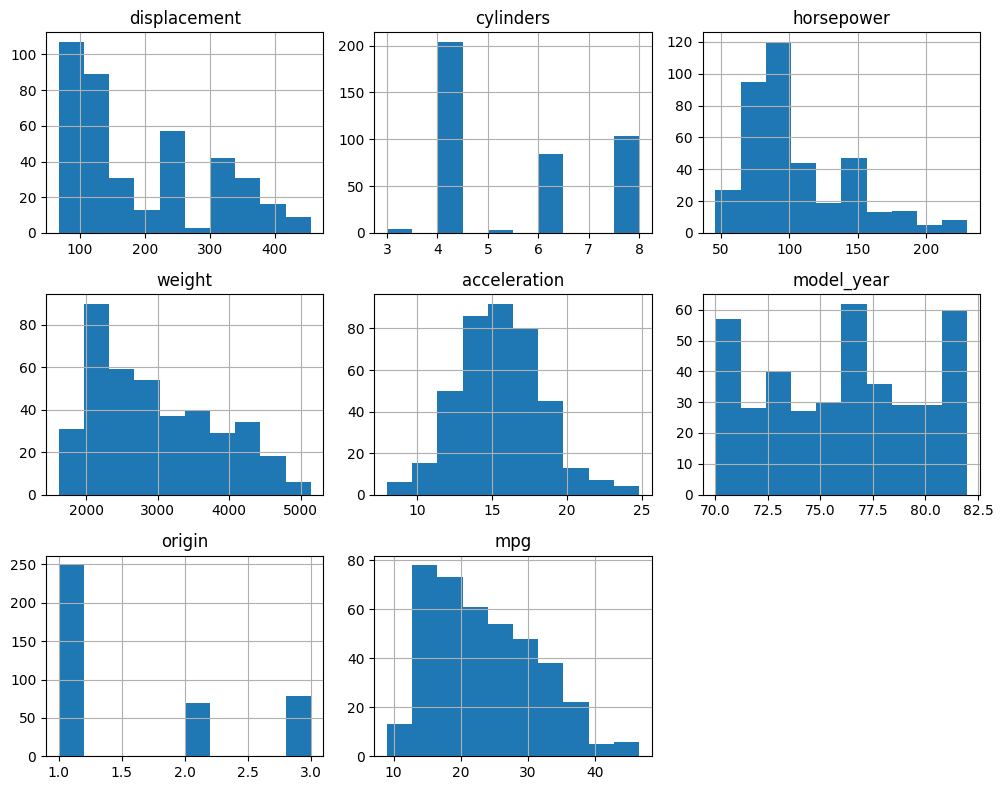

In [ ]:
df.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

Saya pakai median karena distribusi beberapa kolom imbalance

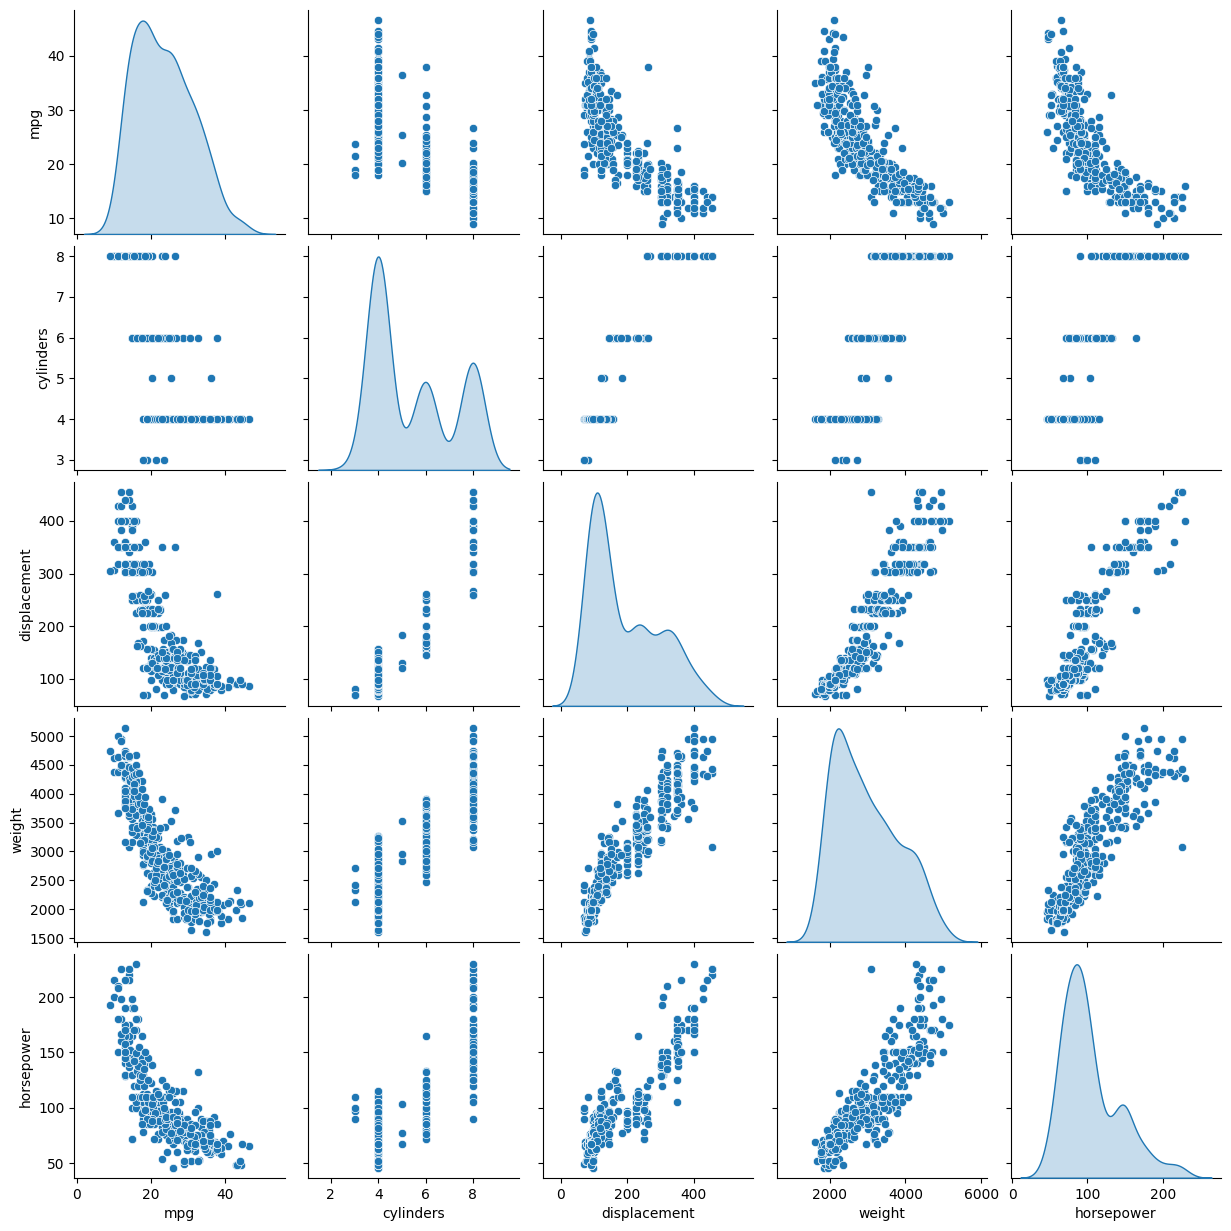

In [ ]:
sns.pairplot(df[["mpg", "cylinders", "displacement", "weight", "horsepower"]], diag_kind="kde")

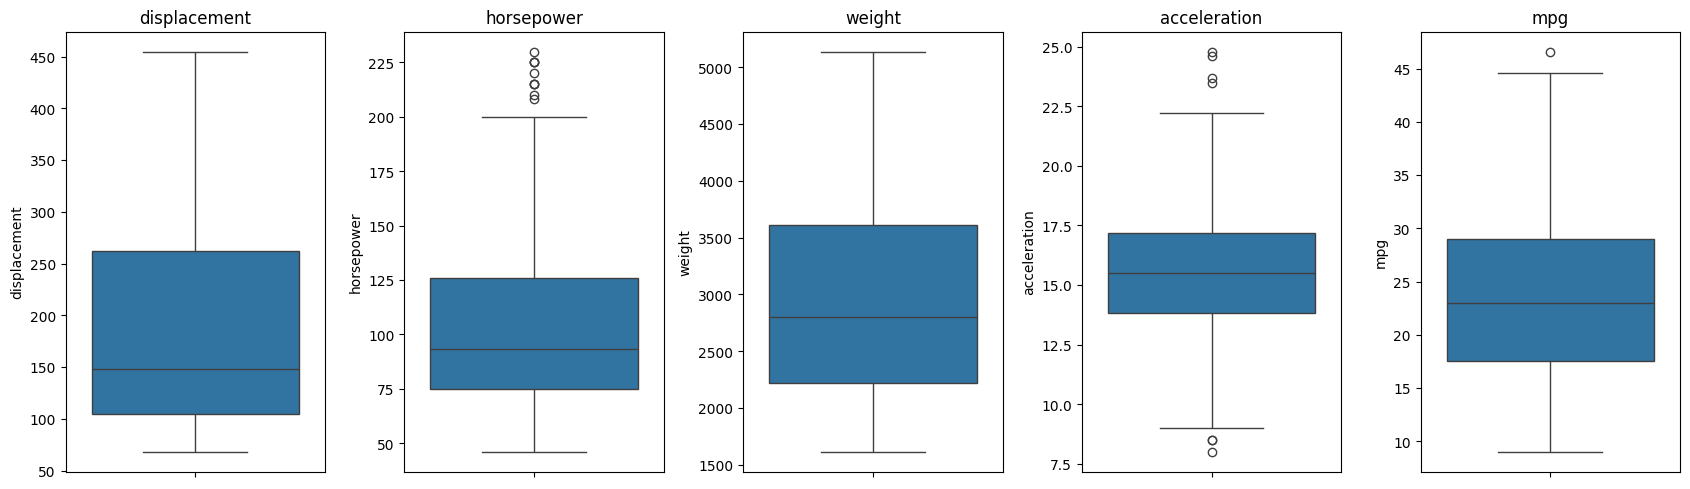

In [ ]:
cols = ["displacement", "horsepower", "weight", "acceleration", "mpg"]

plt.figure(figsize=(17, 5))
for i, col in enumerate(cols, 1):
    plt.subplot(1, len(cols), i)   # 1 baris, n kolom
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


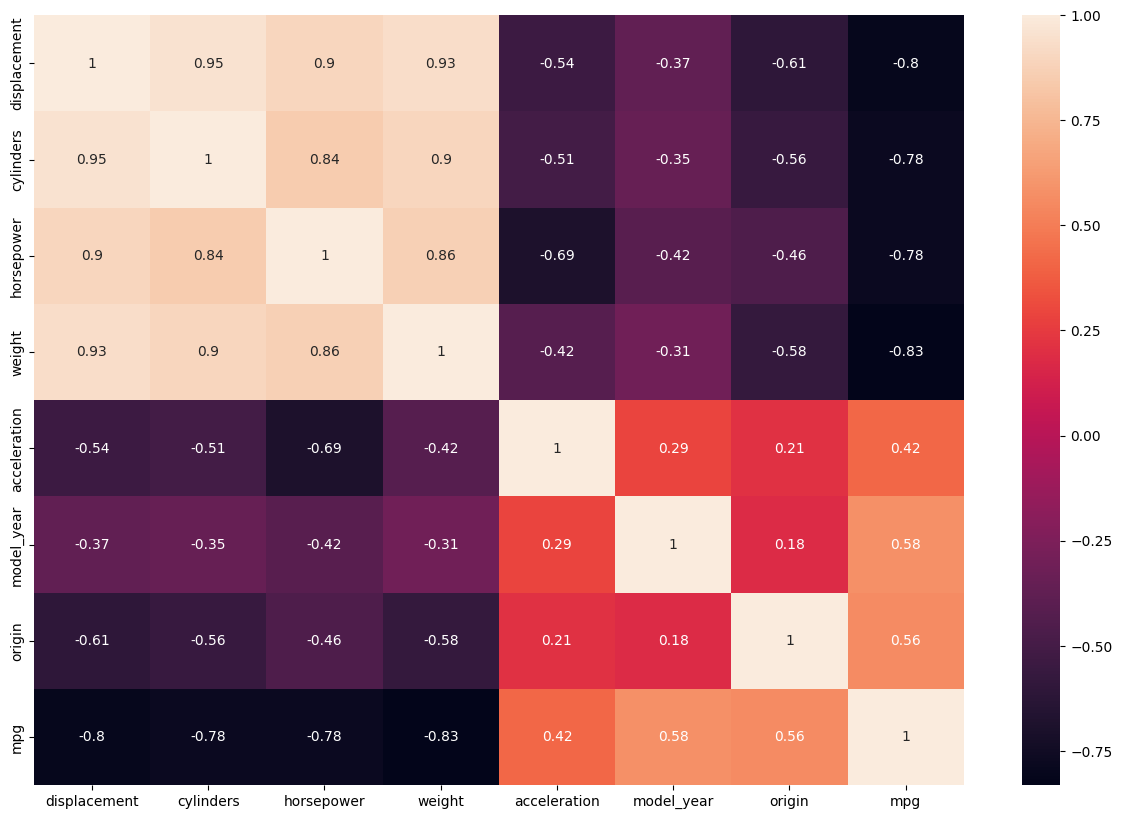

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
correlation_matrix = df.corr()

stacked_corr = correlation_matrix.stack().reset_index()
stacked_corr.columns = ['Variable 1', 'Variable 2', 'Correlation']

high_corr = stacked_corr[(stacked_corr['Correlation'].abs() > 0.5) & (stacked_corr['Variable 1'] != stacked_corr['Variable 2'])]

display(high_corr)

,Variable 1,Variable 2,Correlation
1,displacement,cylinders,0.950721
2,displacement,horsepower,0.897257
3,displacement,weight,0.932824
4,displacement,acceleration,-0.543684
6,displacement,origin,-0.609409
7,displacement,mpg,-0.804203
8,cylinders,displacement,0.950721
10,cylinders,horsepower,0.842983
11,cylinders,weight,0.896017
12,cylinders,acceleration,-0.505419


In [ ]:
high_corr_columns = pd.concat([high_corr['Variable 1'], high_corr['Variable 2']]).unique()

print("kolom dengan korelasi > 0.5:")
for col in high_corr_columns:
    print(col)

kolom dengan korelasi > 0.5:
displacement
cylinders
horsepower
weight
acceleration
model_year
origin
mpg


disini saya menggunakan kolom dengan korelasi > 0,5 untuk melatih model

# Pre-Processing

In [ ]:
df2 = df[['displacement', 'cylinders', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'mpg']]
df_clean = df2.copy()
df_clean.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0


In [ ]:
median = df_clean['horsepower'].median()
df_clean['horsepower'] = df_clean['horsepower'].fillna(median)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   displacement  398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   horsepower    398 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   model_year    398 non-null    int64  
 6   origin        398 non-null    int64  
 7   mpg           398 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.0 KB


In [ ]:
cols_to_check = ["horsepower", "mpg", "acceleration"]

for col in cols_to_check:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)].copy()

print(f"Original shape: {df.shape}")
print(f"Shape after outlier removal: {df_clean.shape}")

Original shape: (398, 8)
Shape after outlier removal: (378, 8)


In [ ]:
df_clean.head()

,displacement,cylinders,horsepower,weight,acceleration,model_year,origin,mpg
0,307.0,8,130.0,3504,12.0,70,1,18.0
1,350.0,8,165.0,3693,11.5,70,1,15.0
2,318.0,8,150.0,3436,11.0,70,1,18.0
3,304.0,8,150.0,3433,12.0,70,1,16.0
4,302.0,8,140.0,3449,10.5,70,1,17.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df_model = df_clean.copy()

df_model = pd.get_dummies(df_model, columns=["origin"], drop_first=True)

X = df_model.drop(columns=["mpg"])
y = df_model["mpg"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=99
)

cols_to_scale = ["displacement", "horsepower", "weight", "acceleration"]

scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

print(X_train_scaled.head())

     displacement  cylinders  horsepower    weight  acceleration  model_year  \
53      -1.155068          4   -1.084411 -1.372842      1.416716          71   
106      1.645776          8    2.355946  1.886862     -1.266365          73   
354     -0.863941          4   -0.231801 -0.718749      0.095815          81   
169      0.461190          6   -0.037346 -0.008454      0.178371          75   
158      1.324532          8    1.458461  1.885666     -0.440802          75   

     origin_2  origin_3  
53      False      True  
106     False     False  
354      True     False  
169     False     False  
158     False     False  


In [ ]:
X_train_scaled.describe()

,displacement,cylinders,horsepower,weight,acceleration,model_year
count,3.020000e+02,302.000000,3.020000e+02,3.020000e+02,3.020000e+02,302.000000
mean,1.176395e-17,5.370861,1.911642e-16,2.235151e-16,4.926155e-17,76.155629
std,1.001660e+00,1.684859,1.001660e+00,1.001660e+00,1.001660e+00,3.634317
min,-1.185185e+00,3.000000,-1.652817e+00,-1.564167e+00,-2.298319e+00,70.000000
25%,-8.840189e-01,4.000000,-7.852492e-01,-8.616447e-01,-6.471924e-01,73.000000
50%,-4.623863e-01,4.000000,-2.766748e-01,-2.195093e-01,-2.801994e-02,76.000000
75%,7.222003e-01,6.000000,5.310611e-01,7.206749e-01,5.911525e-01,79.000000
max,2.438847e+00,8.000000,2.894436e+00,2.653359e+00,2.696339e+00,82.000000


# Modeling

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "SVR (RBF Kernel)": SVR(kernel='rbf')
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    })

results_df = pd.DataFrame(results).sort_values(by="RMSE")
print(results_df.round(4))

               Model      MSE    RMSE  R2 Score
1      Random Forest   4.9949  2.2349    0.8962
0  Linear Regression   6.0667  2.4631    0.8739
2   SVR (RBF Kernel)  38.9796  6.2434    0.1900


# Evaluate

In [ ]:
results

[{'Model': 'Linear Regression',
  'MSE': 6.066734598176744,
  'RMSE': np.float64(2.4630742169444964),
  'R2 Score': 0.8739278229455161},
 {'Model': 'Random Forest',
  'MSE': 4.994913210526323,
  'RMSE': np.float64(2.23493024735143),
  'R2 Score': 0.8962012310809662},
 {'Model': 'SVR (RBF Kernel)',
  'MSE': 38.97961911074344,
  'RMSE': np.float64(6.243366008071563),
  'R2 Score': 0.18996861284769473}]

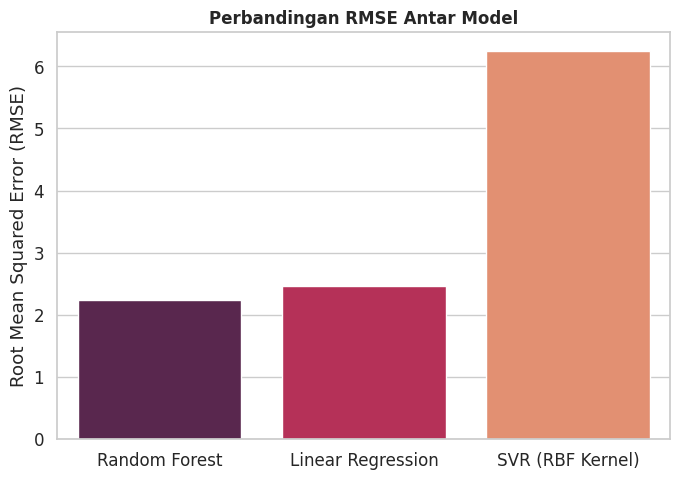

In [ ]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(7, 5))

sns.barplot(
    x="Model", y="RMSE", data=results_df,
    palette="rocket"
)
plt.title("Perbandingan RMSE Antar Model", fontsize=12, weight='semibold')
plt.ylabel("Root Mean Squared Error (RMSE)")
plt.xlabel("")
plt.tight_layout()
plt.show()


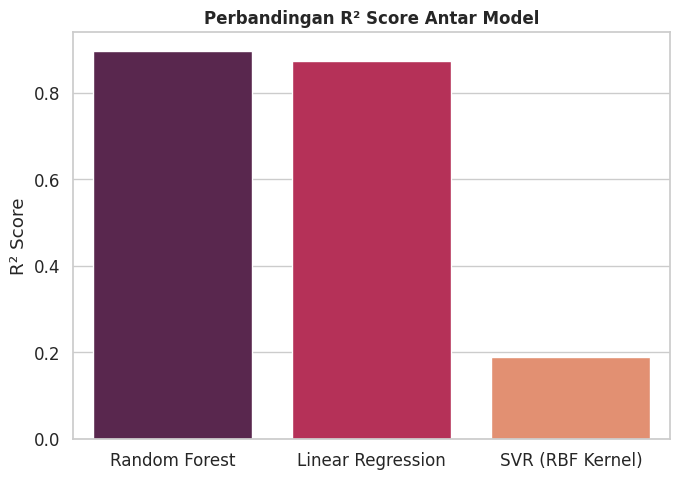

In [ ]:
plt.figure(figsize=(7, 5))
sns.barplot(
    x="Model", y="R2 Score", data=results_df,
    palette="rocket"
)
plt.title("Perbandingan R² Score Antar Model", fontsize=12, weight='semibold')
plt.ylabel("R² Score")
plt.xlabel("")
plt.tight_layout()
plt.show()